# WeatherPy

Weather: The state of the atmosphere with respect to heat or cold, wetness or dryness, calm or storm, clearness or cloudiness.

•Observation 1: Southern Hemisphere climates tend to be slightly milder than those at similar latitudes in the Northern Hemisphere. The Southern Hemisphere has significantly more ocean and less land; water warms and cools more slowly than land.

•Observation 2: Highest temperature is found at 0 latitude and as the latidude increases or decreases, temperature drops. This happens as equatorial region receives sunlight straight with less or no angle due to curvature shape of earth.

•Observation 3: Latitude doesn't have a strong influence on wind speed. The speed of the wind is controlled by the strength of the air pressure gradient, the stronger the pressure gradient the higher the wind speed.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import date
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### API Calls
* Weather check on each city using a series of successive API calls.
* Print log of each city as it's being processed (with the city number and city name).

In [4]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")

City Name: cape town, City ID: 3369157
City Name: klaksvik, City ID: 2618795
City Name: bluff, City ID: 2206939
City Name: kaitangata, City ID: 2208248
City Name: seoul, City ID: 1835848
City Name: nalut, City ID: 2214432
City Name: saint anthony, City ID: 5044290
City Name: pevek, City ID: 2122090
City Name: saint-pierre, City ID: 935214
City Name: obidos, City ID: 3393768
City Name: krasnoselkup, City ID: 1502073
That record does not exist, searching for next record...
City Name: soyo, City ID: 2236967
City Name: cherskiy, City ID: 2126199
That record does not exist, searching for next record...
City Name: aksha, City ID: 2028028
City Name: moundou, City ID: 2427455
City Name: atambua, City ID: 1651103
City Name: yellowknife, City ID: 6185377
City Name: tuktoyaktuk, City ID: 6170031
City Name: kapaa, City ID: 5848280
City Name: busselton, City ID: 2075265
City Name: qaanaaq, City ID: 3831208
City Name: ushuaia, City ID: 3833367
City Name: vaini, City ID: 4032243
City Name: butaritari

City Name: grand gaube, City ID: 934479
City Name: haibara, City ID: 1863398
City Name: ribeira grande, City ID: 3372707
City Name: qaqortoq, City ID: 3420846
That record does not exist, searching for next record...
City Name: iquique, City ID: 3887127
City Name: berlevag, City ID: 780687
City Name: camacha, City ID: 2270385
City Name: caravelas, City ID: 3466980
City Name: sistranda, City ID: 3139597
City Name: longyearbyen, City ID: 2729907
City Name: ancud, City ID: 3899695
That record does not exist, searching for next record...
City Name: katsuura, City ID: 2112309
City Name: saint george, City ID: 5546220
City Name: marzuq, City ID: 72181
City Name: coxim, City ID: 3465228
City Name: norsup, City ID: 2135517
City Name: la grande, City ID: 5735537
City Name: saint-augustin, City ID: 6137462
City Name: sibu, City ID: 1735902
City Name: zabol, City ID: 1121143
City Name: ndende, City ID: 2397614
City Name: surt, City ID: 2210554
City Name: mutoko, City ID: 884927
City Name: talnakh,

City Name: niagara falls, City ID: 6087892
That record does not exist, searching for next record...
City Name: bethel, City ID: 5282297
City Name: chumikan, City ID: 2025256
City Name: adrar, City ID: 2381972
City Name: saint-francois, City ID: 2980080
City Name: nhulunbuy, City ID: 2064735
City Name: chapais, City ID: 5919850
City Name: aswan, City ID: 359792
City Name: te karaka, City ID: 2184772
City Name: hasaki, City ID: 2112802
City Name: martapura, City ID: 1636022
City Name: luang prabang, City ID: 1655559
City Name: zavodskoy, City ID: 2012623
City Name: linkoping, City ID: 2694762
City Name: nemuro, City ID: 2128975
City Name: port augusta, City ID: 2063056
City Name: ossora, City ID: 2122389
City Name: robertsport, City ID: 2274275
City Name: jardim, City ID: 3460087
That record does not exist, searching for next record...
City Name: gravdal, City ID: 3155152
City Name: leh, City ID: 1264976
City Name: kwinana, City ID: 2068079
City Name: strezhevoy, City ID: 1490796
That re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert the data into a dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,3369157,Cape Town,ZA,-33.9258,18.4232,56.66,81,0,12.66
1,2618795,Klaksvík,FO,62.2266,-6.5890,45.52,80,100,18.28
2,2206939,Bluff,NZ,-46.6000,168.3333,58.80,92,100,5.53
3,2208248,Kaitangata,NZ,-46.2817,169.8464,55.72,96,100,2.66
4,1835848,Seoul,KR,37.5683,126.9778,62.40,33,0,6.91


In [6]:
# Export to .csv file
cities_df.to_csv("../WeatherPy/city_weather.csv", index=False, header=True)

## Plotting the Weather Data

Weather data includes any facts or numbers about the state of the atmosphere, including temperature, wind speed, rain or snow, humidity, and pressure.

## Latitude vs. Temperature Plot

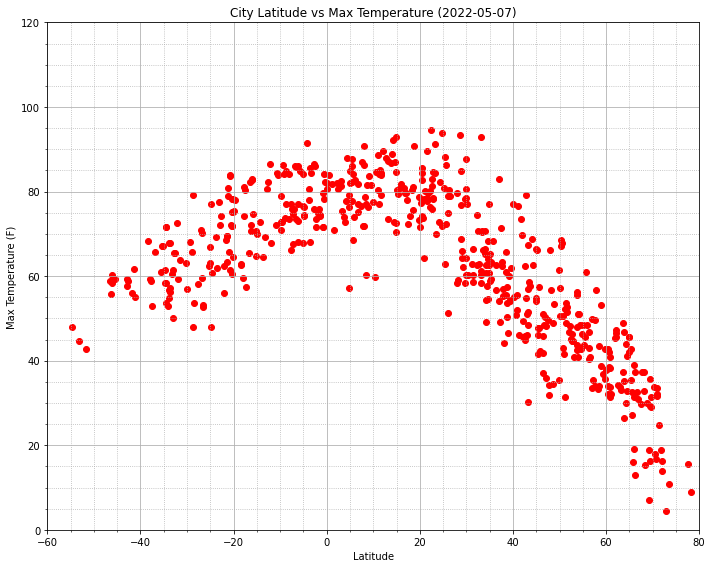

<Figure size 432x288 with 0 Axes>

In [7]:
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values, color='r')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.ylim(0, 120)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../WeatherPy/Images/lat_temp.png")

## Latitude vs. Humidity Plot

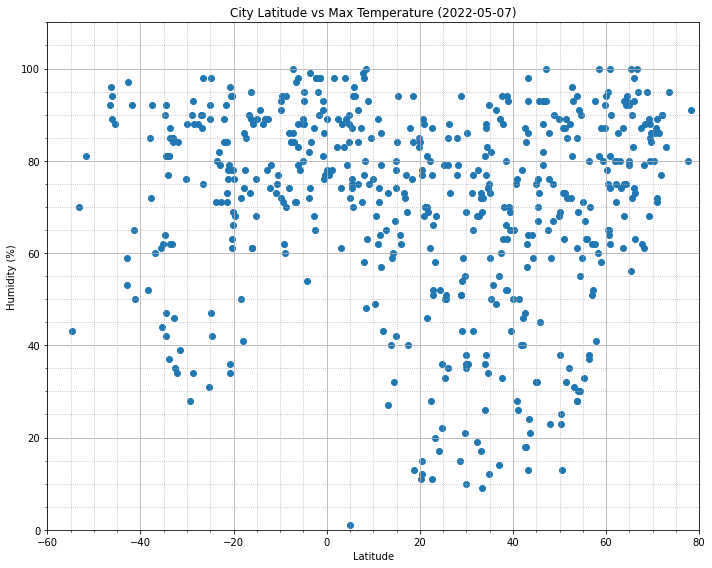

<Figure size 432x288 with 0 Axes>

In [8]:
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 110)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../WeatherPy/Images/lat_humid.png")

## Latitude vs. Cloudiness Plot

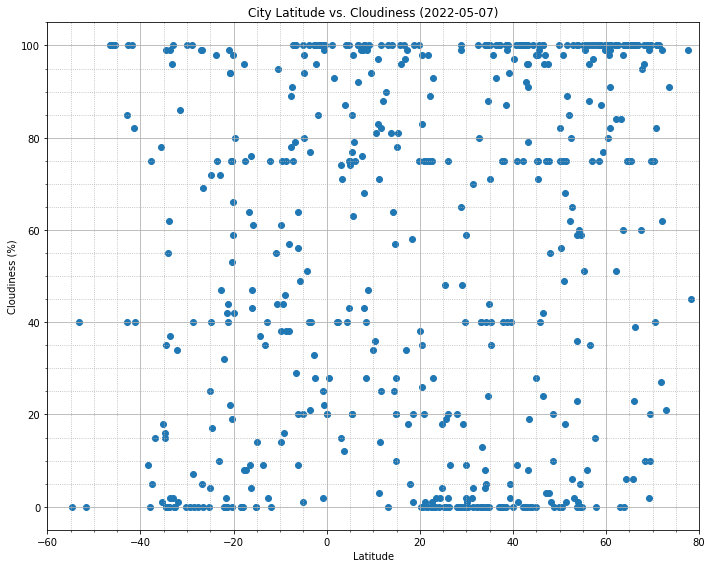

<Figure size 432x288 with 0 Axes>

In [9]:
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.title(f'City Latitude vs. Cloudiness ({datetime.now().date()})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../WeatherPy/Images/lat_clouds.png")

## Latitude vs. Wind Speed Plot

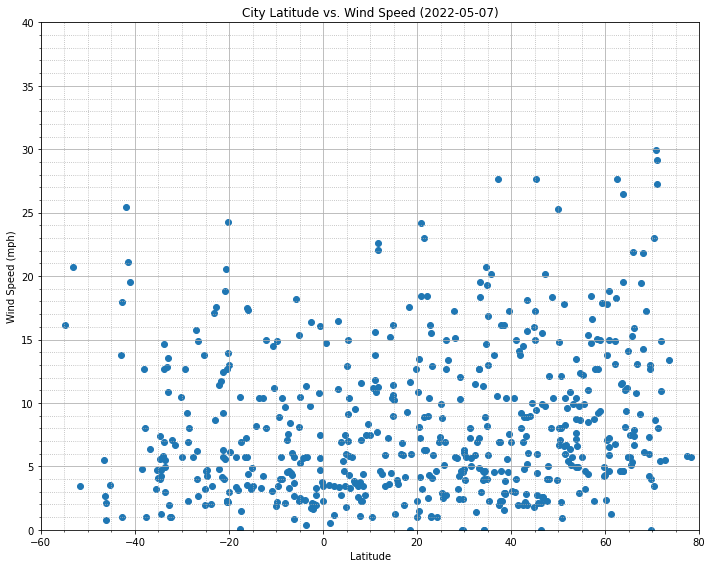

<Figure size 432x288 with 0 Axes>

In [10]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.title(f'City Latitude vs. Wind Speed ({datetime.now().date()})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../WeatherPy/Images/lat_wind.png")

## Linear Regression

In [11]:
northern_df = cities_df.loc[pd.to_numeric(cities_df["Lat"]).astype(float) > 0, :]
southern_df = cities_df.loc[pd.to_numeric(cities_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.88x + 92.2
The r-squared is: -0.8824856757914186
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


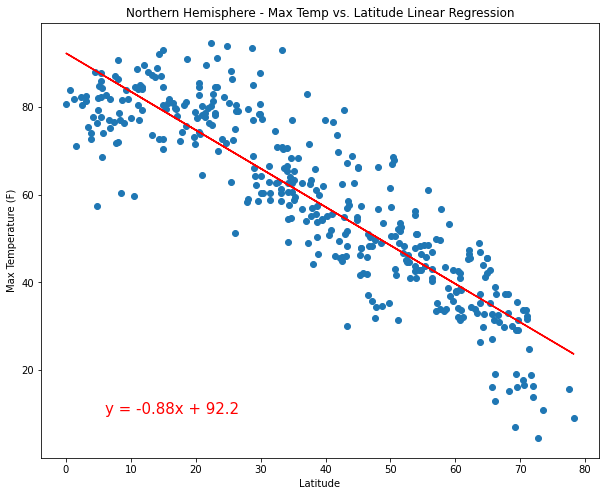

In [12]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.56x + 81.01
The r-squared is: 0.7312487916754822
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


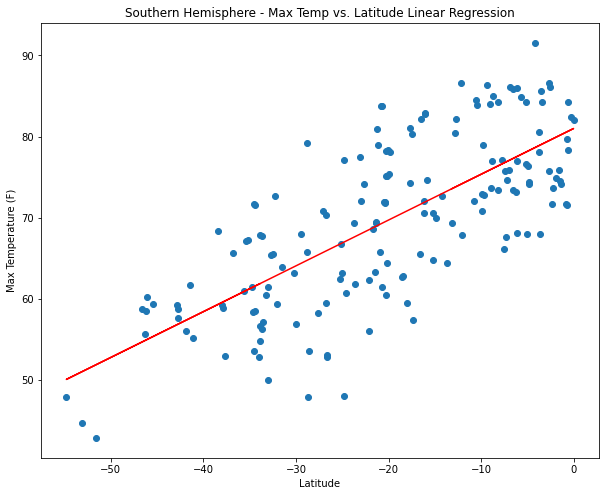

In [13]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.12x + 63.08
The r-squared is: 0.10738634587541164
The regression does not display much of a correlation between the data sets.


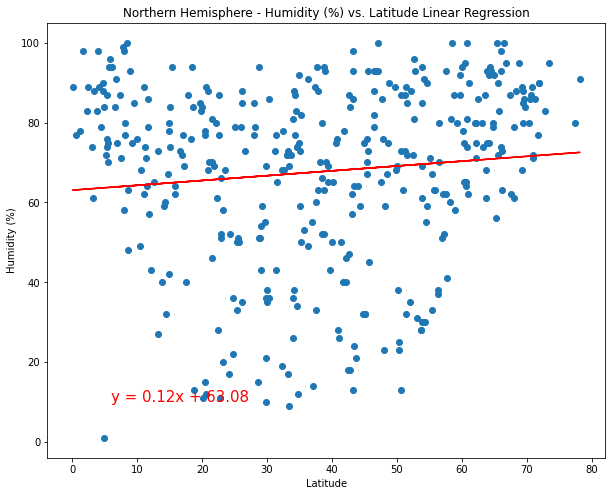

In [14]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.35x + 83.92
The r-squared is: 0.2768414384281141
The regression does not display much of a correlation between the data sets.


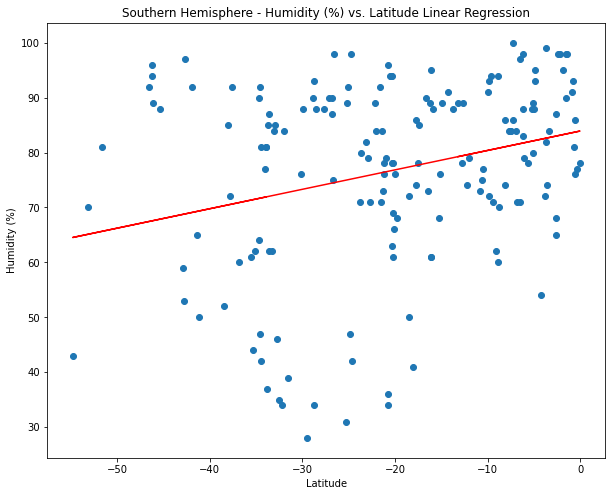

In [15]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.33x + 43.97
The r-squared is: 0.16878792167971604
The regression does not display much of a correlation between the data sets.


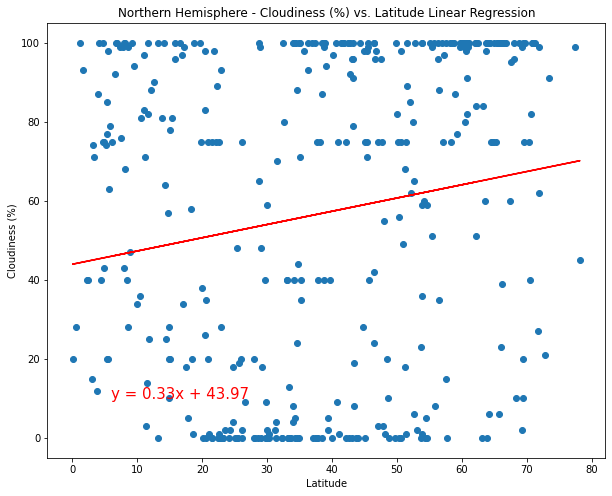

In [16]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Clouds']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")

plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.39x + 56.02
The r-squared is: 0.13870156881576284
The regression does not display much of a correlation between the data sets.


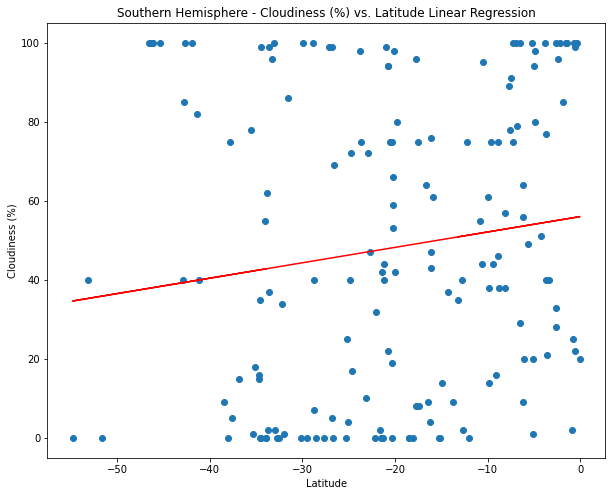

In [17]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Clouds']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")

plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.06x + 6.22
The r-squared is: 0.2158397678927261
The regression does not display much of a correlation between the data sets.


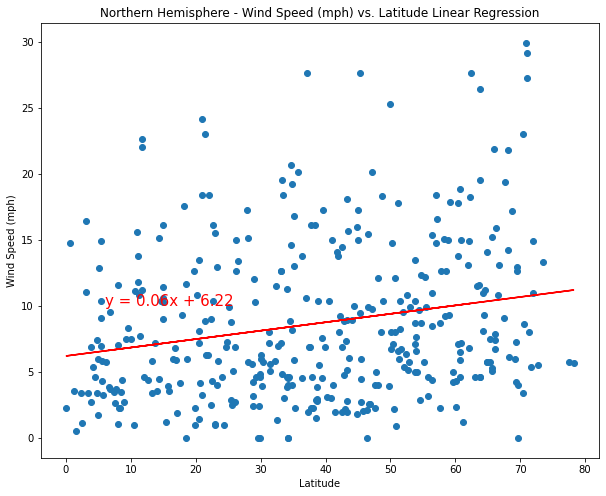

In [18]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")

plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.06x + 5.98
The r-squared is: -0.15232401203210144
The regression does not display much of a correlation between the data sets.


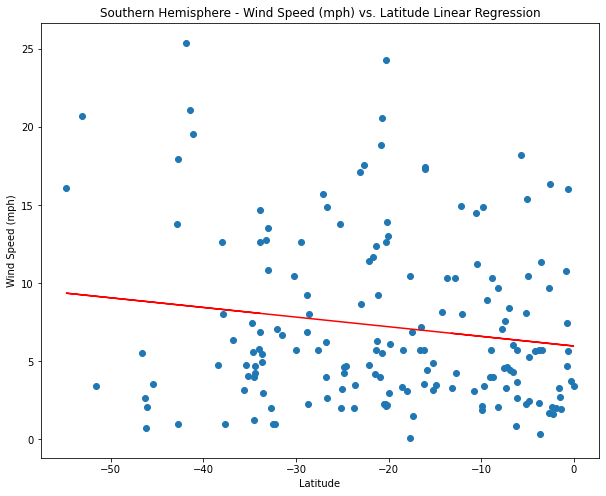

In [19]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()